In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

from sklearn.feature_selection import RFECV, VarianceThreshold
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_validate
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

random_state = 42
from train_test_split import *

from catboost import CatBoostClassifier

from lightgbm import LGBMClassifier
from sklearn import preprocessing, compose, metrics

from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import time



In [32]:
def load_data(path):

    return pd.read_csv(path,index_col='row_id')

dataset_original = load_data('train.csv').copy()


In [33]:
dataset_original

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
row_id,,,,,,,,,,,,,,,,,,,,,
0,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,-9.536743e-07,-9.536743e-06,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,-9.536743e-07,-1.536743e-06,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-6.536743e-06,...,0.000084,0.000048,0.000081,0.000106,0.000072,1.046326e-05,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,4.632568e-08,-5.536743e-06,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-6.536743e-06,...,0.000151,0.000100,0.000180,0.000202,0.000153,2.146326e-05,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-9.536743e-07,4.632568e-07,-0.000003,0.000176,0.000350,0.000290,0.000200,0.000206,-0.000023,-9.536743e-06,...,0.000124,0.000057,0.000104,0.000144,0.000027,4.632568e-07,0.000060,0.000020,-9.536743e-07,Salmonella_enterica
199996,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
199997,4.632568e-08,1.463257e-06,-0.000005,-0.000031,-0.000019,-0.000037,-0.000037,-0.000015,-0.000005,-7.536743e-06,...,0.000115,0.000131,0.000110,0.000213,0.000094,1.646326e-05,0.000035,0.000021,4.632568e-08,Streptococcus_pneumoniae


In [34]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype=int)
dataset_original["target_code"] = ord_enc.fit_transform(dataset_original[["target"]])
dataset_original[["target", "target_code"]]

,target,target_code
row_id,,
0,Streptococcus_pyogenes,9
1,Salmonella_enterica,6
2,Salmonella_enterica,6
3,Salmonella_enterica,6
4,Enterococcus_hirae,2
...,...,...
199995,Salmonella_enterica,6
199996,Streptococcus_pyogenes,9
199997,Streptococcus_pneumoniae,8


In [35]:
dataset_original

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target,target_code
row_id,,,,,,,,,,,,,,,,,,,,,
0,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes,9
1,-9.536743e-07,-9.536743e-06,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica,6
2,-9.536743e-07,-1.536743e-06,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-6.536743e-06,...,0.000048,0.000081,0.000106,0.000072,1.046326e-05,0.000008,0.000019,1.046326e-06,Salmonella_enterica,6
3,4.632568e-08,-5.536743e-06,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-6.536743e-06,...,0.000100,0.000180,0.000202,0.000153,2.146326e-05,0.000015,0.000046,-9.536743e-07,Salmonella_enterica,6
4,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-9.536743e-07,4.632568e-07,-0.000003,0.000176,0.000350,0.000290,0.000200,0.000206,-0.000023,-9.536743e-06,...,0.000057,0.000104,0.000144,0.000027,4.632568e-07,0.000060,0.000020,-9.536743e-07,Salmonella_enterica,6
199996,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes,9
199997,4.632568e-08,1.463257e-06,-0.000005,-0.000031,-0.000019,-0.000037,-0.000037,-0.000015,-0.000005,-7.536743e-06,...,0.000131,0.000110,0.000213,0.000094,1.646326e-05,0.000035,0.000021,4.632568e-08,Streptococcus_pneumoniae,8


In [36]:
# dataset_original.dtypes

In [37]:
# dataset_original.keys()

In [38]:
# dataset_original.target

In [39]:
# dataset_original['target'].value_counts()

In [40]:
# dataset_original['target'] = dataset_original['target'].astype('category')
# dataset_original.dtypes

In [41]:
# dataset_original['target'] = dataset_original['target'].cat.codes
# dataset_original

In [42]:
def select_target(df):
    return df['target_code']

y_dataset_original = select_target(dataset_original)
print(y_dataset_original.shape)
y_dataset_original[:5]


(200000,)


row_id
0    9
1    6
2    6
3    6
4    2
Name: target_code, dtype: int32

In [43]:
def select_features(df):
    drop_target = df.drop('target',axis=1)
    drop_both = drop_target.drop('target_code',axis=1)
    return drop_both
    
X_dataset_original = select_features(dataset_original)
print(X_dataset_original.shape)
X_dataset_original[:5]

(200000, 286)


,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
row_id,,,,,,,,,,,,,,,,,,,,,
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000042,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06
3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000068,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07
4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07


In [44]:
model = ExtraTreesClassifier()
model.fit(X_dataset_original,y_dataset_original)

ExtraTreesClassifier()

### PLOT LARGEST SCORE VALUE TO SELECT VARIABLES

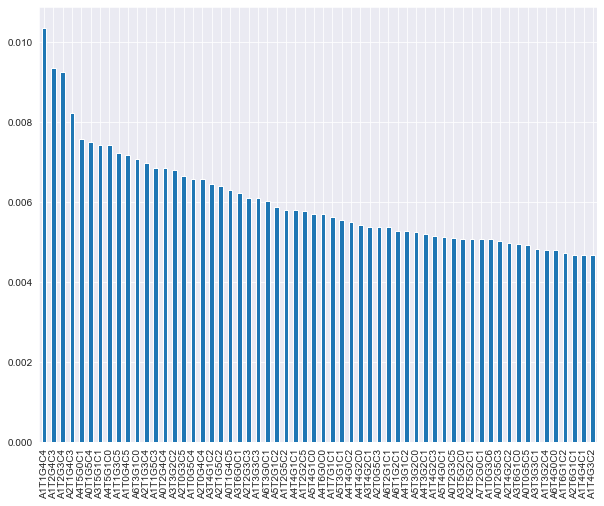

60 : Index(['A1T1G4C4', 'A1T2G4C3', 'A1T2G3C4', 'A2T1G4C3', 'A4T5G0C1', 'A0T1G5C4',
       'A3T5G1C1', 'A4T5G1C0', 'A1T1G3C5', 'A1T0G4C5', 'A6T3G1C0', 'A2T1G3C4',
       'A1T1G5C3', 'A0T2G4C4', 'A3T3G2C2', 'A2T0G3C5', 'A1T0G5C4', 'A2T0G4C4',
       'A3T4G1C2', 'A2T1G5C2', 'A0T1G4C5', 'A3T6G0C1', 'A2T2G3C3', 'A1T3G3C3',
       'A6T3G0C1', 'A5T2G1C2', 'A1T2G5C2', 'A4T4G1C1', 'A1T2G2C5', 'A5T4G1C0',
       'A4T6G0C0', 'A1T7G1C1', 'A5T3G1C1', 'A4T4G0C2', 'A4T4G2C0', 'A3T4G2C1',
       'A2T0G5C3', 'A6T2G1C1', 'A6T1G2C1', 'A4T3G1C2', 'A5T3G2C0', 'A4T3G2C1',
       'A1T4G2C3', 'A5T4G0C1', 'A0T2G3C5', 'A3T5G2C0', 'A2T5G2C1', 'A7T2G0C1',
       'A1T0G3C6', 'A0T2G5C3', 'A2T4G2C2', 'A3T6G1C0', 'A0T0G5C5', 'A3T3G3C1',
       'A1T3G2C4', 'A6T4G0C0', 'A1T6G1C2', 'A2T6G1C1', 'A1T4G4C1', 'A1T4G3C2'],
      dtype='object')


In [45]:
'''
for i in range(20,101,10):
    plt.figure(figsize=(10,8))
    feat_importances = pd.Series(model.feature_importances_,index=X_train.columns)
    feat_importances.nlargest(i).plot(kind='bar')

    plt.show()
    print(i,":", feat_importances.nlargest(i).index)
'''

plt.figure(figsize=(10,8))
feat_importances = pd.Series(model.feature_importances_,index=X_dataset_original.columns)
feat_importances.nlargest(60).plot(kind='bar')

plt.show()
print(60,":", feat_importances.nlargest(60).index)

In [74]:
### Univariate Selection ####
'''
from sklearn.feature_selection import SelectKBest,chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['feature','score']
featureScores
'''
### Cannot accept negative values

ValueError: Input X must be non-negative.

### PLOT BOX PLOT

In [36]:
# boxplot_data = X_train.copy()

selected_features = ['A1T1G4C4', 'A2T1G3C4', 'A1T2G3C4', 'A2T1G4C3', 'A1T1G3C5', 'A1T1G5C3',
       'A1T2G4C3', 'A1T0G5C4', 'A5T4G1C0', 'A2T0G4C4', 'A3T4G1C2', 'A4T4G1C1',
       'A3T5G1C1', 'A3T6G1C0', 'A4T5G0C1', 'A4T3G1C2', 'A2T2G3C3', 'A4T4G2C0',
       'A0T1G4C5', 'A1T2G2C5', 'A1T0G4C5', 'A2T5G1C2', 'A1T3G3C3', 'A2T1G2C5',
       'A3T4G2C1', 'A5T3G1C1', 'A6T2G1C1', 'A2T4G3C1', 'A0T1G5C4', 'A4T5G1C0',
       'A5T2G1C2', 'A2T5G2C1', 'A3T3G2C2', 'A1T6G1C2', 'A4T4G0C2', 'A4T6G0C0',
       'A0T2G5C3', 'A2T0G5C3', 'A1T2G5C2', 'A4T2G2C2', 'A2T1G5C2', 'A1T5G1C3',
       'A2T6G1C1', 'A1T7G1C1', 'A0T3G4C3', 'A2T7G0C1', 'A6T2G0C2', 'A0T2G4C4',
       'A6T1G3C0', 'A7T1G1C1', 'A0T2G3C5', 'A7T3G0C0', 'A1T1G2C6', 'A2T2G2C4',
       'A3T3G3C1', 'A6T1G1C2', 'A5T3G2C0', 'A4T1G3C2', 'A4T3G0C3', 'A2T2G4C2']

# boxplot_data[selected_features] = np.log(boxplot_data[selected_features])
# boxplot_data.boxplot(column=selected_features)
# plt.ylabel(selected_features)
# plt.title(selected_features)
# plt.show()
'''
for feature in selected_features:
       # boxplot_data[feature]=np.log(boxplot_data[feature])
       original_train_data.boxplot(column=feature)
       plt.ylabel(feature)
       plt.title(feature)
       plt.show()
'''

'\nfor feature in selected_features:\n       # boxplot_data[feature]=np.log(boxplot_data[feature])\n       original_train_data.boxplot(column=feature)\n       plt.ylabel(feature)\n       plt.title(feature)\n       plt.show()\n'

### REMOVING OUTLIERS FROM THE BOXPLOT

In [37]:
# boxplot_data = X_train.copy()
selected_features = ['A1T1G4C4', 'A2T1G3C4', 'A1T2G3C4', 'A2T1G4C3', 'A1T1G3C5', 'A1T1G5C3',
       'A1T2G4C3', 'A1T0G5C4', 'A5T4G1C0', 'A2T0G4C4', 'A3T4G1C2', 'A4T4G1C1',
       'A3T5G1C1', 'A3T6G1C0', 'A4T5G0C1', 'A4T3G1C2', 'A2T2G3C3', 'A4T4G2C0',
       'A0T1G4C5', 'A1T2G2C5', 'A1T0G4C5', 'A2T5G1C2', 'A1T3G3C3', 'A2T1G2C5',
       'A3T4G2C1', 'A5T3G1C1', 'A6T2G1C1', 'A2T4G3C1', 'A0T1G5C4', 'A4T5G1C0',
       'A5T2G1C2', 'A2T5G2C1', 'A3T3G2C2', 'A1T6G1C2', 'A4T4G0C2', 'A4T6G0C0',
       'A0T2G5C3', 'A2T0G5C3', 'A1T2G5C2', 'A4T2G2C2', 'A2T1G5C2', 'A1T5G1C3',
       'A2T6G1C1', 'A1T7G1C1', 'A0T3G4C3', 'A2T7G0C1', 'A6T2G0C2', 'A0T2G4C4',
       'A6T1G3C0', 'A7T1G1C1', 'A0T2G3C5', 'A7T3G0C0', 'A1T1G2C6', 'A2T2G2C4',
       'A3T3G3C1', 'A6T1G1C2', 'A5T3G2C0', 'A4T1G3C2', 'A4T3G0C3', 'A2T2G4C2']

features_tbs = feat_importances.nlargest(60).index

# # boxplot_data[selected_features] = np.log(boxplot_data[selected_features])
# # boxplot_data.boxplot(column=selected_features)
# # plt.ylabel(selected_features)
# # plt.title(selected_features)
# # plt.show()
dataset = load_data('./train/train.csv')

# for feature in feat_importances.nlargest(60).index:
    
#     q1 = dataset[feature].quantile(0.25)
#     q3 = dataset[feature].quantile(0.75)
#     IQR = q3-q1
#     lower_extreme = q1 - 1.5*IQR
#     upper_extreme = q3 + 1.5*IQR

#     out1 = dataset[(dataset[feature]<lower_extreme)].index
#     out2 = dataset[(dataset[feature]>upper_extreme)].index

#     dataset.drop(out1,inplace=True)
#     dataset.drop(out2,inplace=True)
    

#     boxplot_data[feature].replace(out1,mean,inplace=True)
#     boxplot_data[feature].replace(out2,mean,inplace=True)
    
    #boxplot_data[feature]=np.log(boxplot_data[feature])
'''
    original_train_data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()
'''

In [39]:
def modified_dataset():
    selected_columns = feat_importances.nlargest(60).index
    df = pd.DataFrame(dataset,columns=selected_columns)
    df['target'] = dataset['target']
    return df
    
new_df = modified_dataset()
new_df

,A1T1G4C4,A2T1G3C4,A1T2G3C4,A2T1G4C3,A1T1G3C5,A1T1G5C3,A1T2G4C3,A1T0G5C4,A5T4G1C0,A2T0G4C4,A3T4G1C2,A4T4G1C1,A3T5G1C1,A3T6G1C0,A4T5G0C1,A4T3G1C2,A2T2G3C3,A4T4G2C0,A0T1G4C5,A1T2G2C5,A1T0G4C5,A2T5G1C2,A1T3G3C3,A2T1G2C5,A3T4G2C1,A5T3G1C1,A6T2G1C1,A2T4G3C1,A0T1G5C4,A4T5G1C0,A5T2G1C2,A2T5G2C1,A3T3G2C2,A1T6G1C2,A4T4G0C2,A4T6G0C0,A0T2G5C3,A2T0G5C3,A1T2G5C2,A4T2G2C2,A2T1G5C2,A1T5G1C3,A2T6G1C1,A1T7G1C1,A0T3G4C3,A2T7G0C1,A6T2G0C2,A0T2G4C4,A6T1G3C0,A7T1G1C1,A0T2G3C5,A7T3G0C0,A1T1G2C6,A2T2G2C4,A3T3G3C1,A6T1G1C2,A5T3G2C0,A4T1G3C2,A4T3G0C3,A2T2G4C2,target
0,0.001619,0.001911,0.001397,0.001380,0.001159,0.001201,0.001955,0.000334,0.000134,0.000939,-0.001610,-0.000369,0.000024,0.000313,0.000177,-0.001728,0.000076,-0.000228,0.000329,0.000118,0.000478,-0.000030,0.000839,0.000847,-0.001564,-0.000045,0.000551,-0.000981,0.000502,0.000142,-0.000233,-0.000120,-0.003455,0.000662,-0.000186,1.317284e-04,0.001156,0.000191,0.000849,-0.001422,-0.000023,0.000337,0.000640,0.000426,0.001109,0.000270,0.000166,0.000895,0.000261,0.000461,0.000313,0.000158,0.000073,-0.000032,-0.002529,0.000679,-0.000033,0.000482,-0.000609,-0.000374,Escherichia_coli
1,-0.003440,-0.005635,-0.005750,-0.005814,-0.002703,-0.002711,-0.005563,-0.000716,0.001716,-0.001635,0.003731,0.003750,0.003684,0.001346,0.001738,0.003566,-0.008494,0.002435,-0.000716,-0.003156,-0.000720,0.004044,-0.005342,-0.003251,0.003915,0.003638,0.002949,0.001211,-0.000737,0.001567,0.003209,0.003348,0.000468,0.002620,0.002443,5.257284e-04,-0.001310,-0.001328,-0.003281,0.001150,-0.003274,0.002193,0.003079,0.001631,-0.001658,0.001186,0.001403,-0.001695,0.001594,0.001581,-0.001308,0.000476,-0.001333,-0.005841,0.001366,0.002153,0.002426,-0.000668,0.001871,-0.006190,Streptococcus_pneumoniae
2,-0.005328,-0.009136,-0.009136,-0.009136,-0.004147,-0.004367,-0.008966,-0.001152,0.003168,-0.002604,0.007504,0.007482,0.007643,0.002869,0.003048,0.008364,-0.013393,0.004816,-0.001172,-0.005210,-0.001112,0.006490,-0.008482,-0.005200,0.007504,0.006883,0.005417,0.002414,-0.001102,0.003008,0.006510,0.006960,0.001987,0.004217,0.004186,9.297284e-04,-0.001973,-0.001963,-0.005570,0.003026,-0.005380,0.002413,0.005987,0.002893,-0.002885,0.002107,0.002908,-0.002584,0.002049,0.003143,-0.002073,0.000816,-0.002143,-0.009804,0.002078,0.003557,0.004447,-0.002666,0.003315,-0.010044,Streptococcus_pyogenes
3,-0.005004,-0.008579,-0.008514,-0.008623,-0.004006,-0.004036,-0.008602,-0.001040,0.002977,-0.002454,0.007221,0.007223,0.006975,0.002637,0.003030,0.007280,-0.013155,0.004244,-0.001056,-0.005079,-0.001050,0.006730,-0.008274,-0.005023,0.006896,0.006909,0.005474,0.002513,-0.001061,0.002789,0.006247,0.006359,0.001839,0.004026,0.003940,8.877284e-04,-0.001890,-0.001968,-0.004997,0.002717,-0.005074,0.002388,0.005564,0.002744,-0.002593,0.001978,0.002803,-0.002458,0.001623,0.002815,-0.001941,0.000812,-0.001956,-0.009613,0.001653,0.003845,0.003989,-0.002008,0.002976,-0.009519,Streptococcus_pyogenes
4,0.001252,0.000824,0.001024,0.000804,0.000853,0.000483,0.001394,0.000298,0.000068,0.000536,-0.000726,-0.000428,0.000123,0.000039,-0.000032,-0.000606,-0.000243,-0.000154,0.000468,0.000300,0.000278,-0.000060,-0.000792,0.000180,-0.000586,0.000073,0.000157,-0.000736,0.000448,0.000038,-0.000260,-0.000180,-0.001543,-0.000123,0.000136,-2.716064e-07,0.000787,0.000287,0.000490,-0.000344,-0.000220,0.000013,0.000007,0.000143,0.000615,0.000147,0.000018,0.000416,0.000129,0.000093,0.000407,0.000076,-0.000033,-0.000084,-0.001252,0.000267,-0.000183,0.000244,0.000005,0.000436,Salmonella_enterica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159986,-0.001008,0.009984,-0.002016,0.008984,0.004193,0.002193,0.000984,0.000798,-0.000202,-0.000004,0.000984,-0.002008,0.002193,0.000199,-0.000202,-0.003016,-0.005033,-0.002004,-0.000202,-0.000210,-0.000202,0.003790,0.001978,-0.004210,-0.001016

In [40]:
def ohe():
    return pd.get_dummies(new_df)

ohe_data = ohe()

In [41]:
ohe_data

,A1T1G4C4,A2T1G3C4,A1T2G3C4,A2T1G4C3,A1T1G3C5,A1T1G5C3,A1T2G4C3,A1T0G5C4,A5T4G1C0,A2T0G4C4,A3T4G1C2,A4T4G1C1,A3T5G1C1,A3T6G1C0,A4T5G0C1,A4T3G1C2,A2T2G3C3,A4T4G2C0,A0T1G4C5,A1T2G2C5,A1T0G4C5,A2T5G1C2,A1T3G3C3,A2T1G2C5,A3T4G2C1,A5T3G1C1,A6T2G1C1,A2T4G3C1,A0T1G5C4,A4T5G1C0,A5T2G1C2,A2T5G2C1,A3T3G2C2,A1T6G1C2,A4T4G0C2,A4T6G0C0,A0T2G5C3,A2T0G5C3,A1T2G5C2,A4T2G2C2,A2T1G5C2,A1T5G1C3,A2T6G1C1,A1T7G1C1,A0T3G4C3,A2T7G0C1,A6T2G0C2,A0T2G4C4,A6T1G3C0,A7T1G1C1,A0T2G3C5,A7T3G0C0,A1T1G2C6,A2T2G2C4,A3T3G3C1,A6T1G1C2,A5T3G2C0,A4T1G3C2,A4T3G0C3,A2T2G4C2,target_Bacteroides_fragilis,target_Campylobacter_jejuni,target_Enterococcus_hirae,target_Escherichia_coli,target_Escherichia_fergusonii,target_Klebsiella_pneumoniae,target_Salmonella_enterica,target_Staphylococcus_aureus,target_Streptococcus_pneumoniae,target_Streptococcus_pyogenes
0,0.001619,0.001911,0.001397,0.001380,0.001159,0.001201,0.001955,0.000334,0.000134,0.000939,-0.001610,-0.000369,0.000024,0.000313,0.000177,-0.001728,0.000076,-0.000228,0.000329,0.000118,0.000478,-0.000030,0.000839,0.000847,-0.001564,-0.000045,0.000551,-0.000981,0.000502,0.000142,-0.000233,-0.000120,-0.003455,0.000662,-0.000186,1.317284e-04,0.001156,0.000191,0.000849,-0.001422,-0.000023,0.000337,0.000640,0.000426,0.001109,0.000270,0.000166,0.000895,0.000261,0.000461,0.000313,0.000158,0.000073,-0.000032,-0.002529,0.000679,-0.000033,0.000482,-0.000609,-0.000374,0,0,0,1,0,0,0,0,0,0
1,-0.003440,-0.005635,-0.005750,-0.005814,-0.002703,-0.002711,-0.005563,-0.000716,0.001716,-0.001635,0.003731,0.003750,0.003684,0.001346,0.001738,0.003566,-0.008494,0.002435,-0.000716,-0.003156,-0.000720,0.004044,-0.005342,-0.003251,0.003915,0.003638,0.002949,0.001211,-0.000737,0.001567,0.003209,0.003348,0.000468,0.002620,0.002443,5.257284e-04,-0.001310,-0.001328,-0.003281,0.001150,-0.003274,0.002193,0.003079,0.001631,-0.001658,0.001186,0.001403,-0.001695,0.001594,0.001581,-0.001308,0.000476,-0.001333,-0.005841,0.001366,0.002153,0.002426,-0.000668,0.001871,-0.006190,0,0,0,0,0,0,0,0,1,0
2,-0.005328,-0.009136,-0.009136,-0.009136,-0.004147,-0.004367,-0.008966,-0.001152,0.003168,-0.002604,0.007504,0.007482,0.007643,0.002869,0.003048,0.008364,-0.013393,0.004816,-0.001172,-0.005210,-0.001112,0.006490,-0.008482,-0.005200,0.007504,0.006883,0.005417,0.002414,-0.001102,0.003008,0.006510,0.006960,0.001987,0.004217,0.004186,9.297284e-04,-0.001973,-0.001963,-0.005570,0.003026,-0.005380,0.002413,0.005987,0.002893,-0.002885,0.002107,0.002908,-0.002584,0.002049,0.003143,-0.002073,0.000816,-0.002143,-0.009804,0.002078,0.003557,0.004447,-0.002666,0.003315,-0.010044,0,0,0,0,0,0,0,0,0,1
3,-0.005004,-0.008579,-0.008514,-0.008623,-0.004006,-0.004036,-0.008602,-0.001040,0.002977,-0.002454,0.007221,0.007223,0.006975,0.002637,0.003030,0.007280,-0.013155,0.004244,-0.001056,-0.005079,-0.001050,0.006730,-0.008274,-0.005023,0.006896,0.006909,0.005474,0.002513,-0.001061,0.002789,0.006247,0.006359,0.001839,0.004026,0.003940,8.877284e-04,-0.001890,-0.001968,-0.004997,0.002717,-0.005074,0.002388,0.005564,0.002744,-0.002593,0.001978,0.002803,-0.002458,0.001623,0.002815,-0.001941,0.000812,-0.001956,-0.009613,0.001653,0.003845,0.003989,-0.002008,0.002976,-0.009519,0,0,0,0,0,0,0,0,0,1
4,0.001252,0.000824,0.001024,0.000804,0.000853,0.000483,0.001394,0.000298,0.000068,0.000536,-0.000726,-0.000428,0.000123,0.000039,-0.000032,-0.000606,-0.000243,-0.000154,0.000468,0.000300,0.000278,-0.000060,-0.000792,0.000180,-0.000586,0.000073,0.000157,-0.000736,0.000448,0.000038,-0.000260,-0.000180,-0.001543,-0.000123,0.000136,-2.716064e-07,0.000787,0.000287,0.000490,-0.000344,-0.000220,0.000013,0.000007,0.000143,0.000615,0.000147,0.000018,0.000416,0.000129,0.000093,0.000407,0.000076,-0.000033,-0.000084,-0.001252,0.000267,-0.000183,0.000244,0.000005,0.000436,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [42]:
def y_target():
    return new_df['target'].values

def X_features():
    return new_df.drop('target',axis=1).values

In [43]:
X = X_features()
y = y_target()

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(46966, 60)
(11742, 60)
(46966,)
(11742,)


In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
X_train_scaled

array([[-0.99658244, -0.95545415, -0.87100194, ..., -1.46547849,
         1.32143701, -0.97724646],
       [-1.54141948, -1.67084125, -1.66766908, ..., -1.37293967,
         1.96238719, -1.7065417 ],
       [-0.97509591, -1.05168771, -1.08006198, ..., -1.32769846,
         0.64603576, -1.16423118],
       ...,
       [-0.46824398, -0.48319683, -0.4760529 , ..., -0.60898024,
         0.20137657, -0.39764867],
       [ 0.89883658,  0.9488503 ,  1.03735432, ...,  0.80686381,
        -0.72159169,  0.84873334],
       [ 0.94142596,  1.086836  ,  0.93269412, ...,  1.13383433,
        -1.16625088,  0.80239842]])

In [48]:
predictions = 0

log_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial',max_iter=100000)
log_reg.fit(X_train_scaled,Y_train)

predictions = log_reg.predict(X_test)

In [49]:
predictions

array(['Enterococcus_hirae', 'Enterococcus_hirae', 'Enterococcus_hirae',
       ..., 'Enterococcus_hirae', 'Enterococcus_hirae',
       'Enterococcus_hirae'], dtype=object)

### Score of Logistic Regression

In [50]:
log_reg.score(X_train_scaled,Y_train)

0.9975940041732317

### Score of Logistic Regression with train.csv

In [21]:
score

0.9927132161819918

In [22]:
from sklearn.model_selection import cross_validate
model_cross = LogisticRegression(max_iter=100000)
#cross validate the training set
cv = cross_validate(model_cross, X_train, Y_train, cv=5)

def print_scores(cv):
    #print out cross validation scores
    [print('Crossvalidation fold: {}  Accuracy: {}'.format(n, score)) for n, score in enumerate(cv['test_score'])]
    #print out the mean of the cross validation
    print('Mean train cross validation score {}'.format(cv['test_score'].mean()))
    
print_scores(cv)

Crossvalidation fold: 0  Accuracy: 0.3196712207042097
Crossvalidation fold: 1  Accuracy: 0.32178162834610685
Crossvalidation fold: 2  Accuracy: 0.323892035988004
Crossvalidation fold: 3  Accuracy: 0.3217062874916685
Crossvalidation fold: 4  Accuracy: 0.31781826260830925
Mean train cross validation score 0.32097388702765967


In [23]:
from sklearn.pipeline import make_pipeline
#define the scaler
scaler = MinMaxScaler()

#define the classifier
classifier = LogisticRegression(max_iter=100000)

#make the pipeline
pipe = make_pipeline(scaler, classifier)

#run the cross validation
cv = cross_validate(pipe, X_train, Y_train, cv=5)
#print results
print_scores(cv)

Crossvalidation fold: 0  Accuracy: 0.9914472953459957
Crossvalidation fold: 1  Accuracy: 0.9913362212595801
Crossvalidation fold: 2  Accuracy: 0.9913362212595801
Crossvalidation fold: 3  Accuracy: 0.9904465674294601
Crossvalidation fold: 4  Accuracy: 0.9891135303265941
Mean train cross validation score 0.9907359671242422


### Classifiers

In [24]:
tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees":   ExtraTreesClassifier(n_estimators=100),
  "Random Forest": RandomForestClassifier(n_estimators=100),
  "AdaBoost":      AdaBoostClassifier(n_estimators=100),
  "Skl GBM":       GradientBoostingClassifier(n_estimators=100),
  "XGBoost":       XGBClassifier(n_estimators=100),
  "LightGBM":      LGBMClassifier(n_estimators=100),
  "CatBoost":      CatBoostClassifier(n_estimators=100)
}

results = pd.DataFrame({'Model': [],  'Explained_variance': [],'MSE': [], 'MAB': [], "R2-score": [], 'Time': []})


In [25]:
for model_name, model in tree_classifiers.items():
    start_time = time.time()
    model.fit(x_train, y_train)
    total_time = time.time() - start_time

    y_pred = model.predict(x_test)

    results = results.append({"Model": model_name,
                              "Explained_variance": metrics.explained_variance_score(y_test, y_pred),
                              "MSE": metrics.mean_squared_error(y_test, y_pred),
                              "MAB": metrics.mean_absolute_error(y_test, y_pred),
                              "R2-score": metrics.r2_score(y_test,y_pred),
                              "Time": total_time},
                             ignore_index=True)

print(results)

NameError: name 'x_train' is not defined